In [ ]:
#| default_exp clus_spatial

In [ ]:
#| hide 
import os 
pat = os.getcwd()
if pat.split("/")[-1] == 'nbs':
    os.chdir("../")
## Esto es necesario para subi pero no 

In [ ]:
#| export
from clusters_curso_nbdev.cluster_ejemplo import *
import numpy as np
import shapely
from shapely.ops import unary_union

Este sirve como la generación de otro modulo para hacer las cosas geoespaciales

In [ ]:
class poli_cluster(data_points):
    def __init__(self,
                 n,
                 min_x = 0,
                 min_y = 0,
                 max_x= 1,
                 max_y=1,
                 number = 13,
                 seed= None):
        if seed != None:
            random.seed(seed)

        ##Get random points inside cluster 
        x = np.random.uniform(min_x, max_x, number)
        y = np.random.uniform(min_y, max_y, number)
        poly = shapely.Polygon(shapely.Polygon(zip(x,y)))
        triangles = shapely.delaunay_triangles(poly)
        self.polygon = shapely.ops.unary_union(triangles)
        bounds_polygon =self.polygon.bounds
        x_array = np.random.uniform(
            low= bounds_polygon[0],
            high= bounds_polygon[2],
            size=n
        )
        y_array = np.random.uniform(
            low= bounds_polygon[1],
            high= bounds_polygon[3],
            size=n
        )
        pre_points =  [shapely.Point(x[0],x[1]) for x in zip(x_array, y_array)]
        self.Points= [x for x in pre_points if self.polygon.contains(x)]

        

In [ ]:
#datos_simples = data_points(500, min_x = .75, min_y= .75, max_x= 1, max_y= 1 )
poli_clus = poli_cluster(500, min_x = .75, min_y= .75, max_x= 1, max_y= 1)

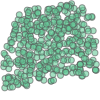

In [ ]:
poli_clus.get_Multypoint()

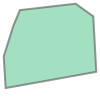

In [ ]:


poli_clus.polygon

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()

/home/miguel/miniconda3/envs/curso_nbdev/lib/python3.11/site-packages/nbdev/export.py:54: UserWarning: Notebook '/mnt/HDD2_2/Cgeo/Cursos_online/cluster_curso/clusters_curso_nbdev/nbs/01_geoespatial.ipynb' uses `#|export` without `#|default_exp` cell.
Note nbdev2 no longer supports nbdev1 syntax. Run `nbdev_migrate` to upgrade.
See https://nbdev.fast.ai/getting_started.html for more information.
  warn(f"Notebook '{nbname}' uses `#|export` without `#|default_exp` cell.\n"
